Autor: Marek Sigmund

Rozkład temperatury w jednowymiarowym pręcie niejednorodnym

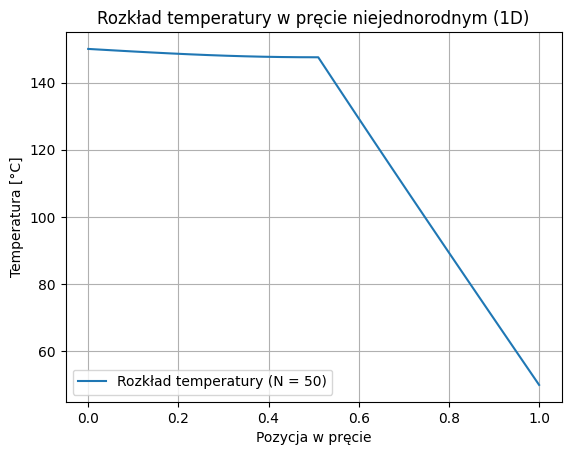

Liczba iteracji: 2122
Czas wykonania: 0.1090 s


(array([150.        , 149.84213656, 149.6855516 , 149.52896706,
        149.37619697, 149.22342773, 149.07694626, 148.93046605,
        148.7926437 , 148.65482301, 148.52788811, 148.40095523,
        148.28695733, 148.17296179, 148.07373804, 147.97451694,
        147.8916619 , 147.80880976, 147.74364924, 147.6784918 ,
        147.63206106, 147.58563356, 147.55866034, 147.53169045,
        147.524583  , 147.51038037, 143.36098791, 139.21159881,
        135.08194906, 130.9523026 , 126.84182527, 122.73135111,
        118.6391611 , 114.5469741 , 110.47188607, 106.39680082,
        102.33734862,  98.27789892,  94.23235966,  90.1868226 ,
         86.15324496,  82.11966917,  78.09590543,  74.07214317,
         70.05588448,  66.03962686,  62.02844113,  58.01725606,
         54.00862792,  50.        ]),
 2122,
 0.10899877548217773)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time

def simulate_heat_transfer_nonhomogeneous1D(N, T0, TN, k, max_iter, tolerance=None):
    """
    Funkcja symuluje rozkład temperatury w jednowymiarowym pręcie niejednorodnym
    przy użyciu metody różnic skończonych (MRS).

    Parametry:
    - N: liczba węzłów siatki (int)
    - T0: temperatura na lewym końcu pręta (float)
    - TN: temperatura na prawym końcu pręta (float)
    - k: tablica z wartościami współczynnika przewodnictwa cieplnego (np.array)
    - max_iter: maksymalna liczba iteracji (int)
    - tolerance: tolerancja zbieżności (float, opcjonalna)

    Zwraca:
    - temperatures: lista z temperaturami w każdym węźle
    - iter_count: liczba wykonanych iteracji
    - exec_time: czas wykonania symulacji (w sekundach)
    """

    # Inicjalizacja tablicy temperatur
    temperatures = np.zeros(N)
    temperatures[0] = T0
    temperatures[-1] = TN

    # Rozpoczęcie pomiaru czasu
    start_time = time.time()

    # Iteracyjna symulacja
    for iter_count in range(1, max_iter + 1):
        prev_temperatures = temperatures.copy()

        # Aktualizacja temperatury na podstawie równania różnic skończonych
        for i in range(1, N - 1):
            k_left = (k[i] + k[i-1]) / 2
            k_right = (k[i] + k[i+1]) / 2
            temperatures[i] = (k_right * prev_temperatures[i+1] + k_left * prev_temperatures[i-1]) / (k_left + k_right)

        # Sprawdzanie zbieżności
        if tolerance and np.max(np.abs(temperatures - prev_temperatures)) < tolerance:
            break

    # Pomiar końcowego czasu
    exec_time = time.time() - start_time

    # Wizualizacja wyników
    plt.plot(np.linspace(0, 1, N), temperatures, label=f'Rozkład temperatury (N = {N})')
    plt.xlabel("Pozycja w pręcie")
    plt.ylabel("Temperatura [°C]")
    plt.title("Rozkład temperatury w pręcie niejednorodnym (1D)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Wyniki końcowe
    print(f"Liczba iteracji: {iter_count}")
    print(f"Czas wykonania: {exec_time:.4f} s")

    return temperatures, iter_count, exec_time

# Przykładowe wywołanie funkcji z tablicą k
N = 50
k = np.array([237.0] * (N // 2) + [0.12] * (N - N // 2))  # Aluminium + Drewno

simulate_heat_transfer_nonhomogeneous1D(
    N=N,
    T0=150,
    TN=50,
    k=k,
    max_iter=10000,
    tolerance=0.01
)


Rozkład temperatury w dwuwymiarowym pręcie niejednorodnym

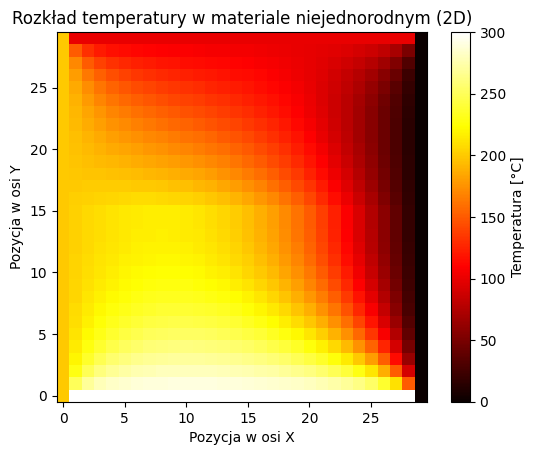

Liczba iteracji: 896
Czas wykonania: 1.7190 s


(array([[200.        , 300.        , 300.        , 300.        ,
         300.        , 300.        , 300.        , 300.        ,
         300.        , 300.        , 300.        , 300.        ,
         300.        , 300.        , 300.        , 300.        ,
         300.        , 300.        , 300.        , 300.        ,
         300.        , 300.        , 300.        , 300.        ,
         300.        , 300.        , 300.        , 300.        ,
         300.        ,   0.        ],
        [200.        , 249.71961155, 269.19896092, 278.19774184,
         282.97325329, 285.77362144, 287.51777009, 288.6285325 ,
         289.32036003, 289.7102377 , 289.86469422, 289.82187454,
         289.60220328, 289.21411631, 288.65655442, 287.92012696,
         286.986524  , 285.82704287, 284.39900563, 282.6400555 ,
         280.45772515, 277.7115068 , 274.17901415, 269.48962873,
         262.98221396, 253.37243775, 237.88876782, 209.77321551,
         150.24082657,   0.        ],
        [200. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time

def simulate_heat_transfer_nonhomogeneous2D(Nx, Ny, TU, TD, TL, TR, k, max_iter, tolerance=None):
    """
    Funkcja symuluje rozkład temperatury w dwuwymiarowym materiale niejednorodnym
    przy użyciu metody różnic skończonych (MRS).

    Parametry:
    - Nx: liczba węzłów siatki w osi X (int)
    - Ny: liczba węzłów siatki w osi Y (int)
    - TU, TD: temperatury na górze i dole domeny (float)
    - TL, TR: temperatury na lewym i prawym boku domeny (float)
    - k: tablica współczynnika przewodnictwa cieplnego (np.array)
    - max_iter: maksymalna liczba iteracji (int)
    - tolerance: tolerancja zbieżności (float, opcjonalna)

    Zwraca:
    - temperatures: tablica 2D z temperaturami w każdym węźle
    - iter_count: liczba wykonanych iteracji
    - exec_time: czas wykonania symulacji (w sekundach)
    """

    # Inicjalizacja tablicy temperatur
    temperatures = np.zeros((Nx, Ny))
    temperatures[0, :] = TU   # Góra
    temperatures[-1, :] = TD  # Dół
    temperatures[:, 0] = TL   # Lewa strona
    temperatures[:, -1] = TR  # Prawa strona

    # Rozpoczęcie pomiaru czasu
    start_time = time.time()

    # Iteracyjna symulacja
    for iter_count in range(1, max_iter + 1):
        prev_temperatures = temperatures.copy()

        # Aktualizacja temperatury w całym obszarze
        for i in range(1, Nx - 1):
            for j in range(1, Ny - 1):
                kx_left = (k[i, j] + k[i-1, j]) / 2
                kx_right = (k[i, j] + k[i+1, j]) / 2
                ky_up = (k[i, j] + k[i, j+1]) / 2
                ky_down = (k[i, j] + k[i, j-1]) / 2

                temperatures[i, j] = (
                    kx_right * prev_temperatures[i+1, j] +
                    kx_left * prev_temperatures[i-1, j] +
                    ky_up * prev_temperatures[i, j+1] +
                    ky_down * prev_temperatures[i, j-1]
                ) / (kx_right + kx_left + ky_up + ky_down)

        # Sprawdzanie zbieżności
        if tolerance and np.max(np.abs(temperatures - prev_temperatures)) < tolerance:
            break

    # Pomiar końcowego czasu
    exec_time = time.time() - start_time

    # Wizualizacja wyników
    plt.imshow(temperatures, cmap='hot', origin='lower')
    plt.colorbar(label="Temperatura [°C]")
    plt.title("Rozkład temperatury w materiale niejednorodnym (2D)")
    plt.xlabel("Pozycja w osi X")
    plt.ylabel("Pozycja w osi Y")
    plt.grid(False)
    plt.show()

    # Wyniki końcowe
    print(f"Liczba iteracji: {iter_count}")
    print(f"Czas wykonania: {exec_time:.4f} s")

    return temperatures, iter_count, exec_time

# Przykładowe wywołanie funkcji z tablicą k
Nx, Ny = 30, 30
k = np.full((Nx, Ny), 237.0)  # Aluminium jako baza
k[Nx//2:, :] = 0.12           # Połowa z drewna

simulate_heat_transfer_nonhomogeneous2D(
    Nx=Nx,
    Ny=Ny,
    TU=300,
    TD=100,
    TL=200,
    TR=0,
    k=k,
    max_iter=10000,
    tolerance=0.01
)


Rozkład temperatury w dwuwymiarowym pręcie

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time

def simulate_heat_transfer_homogeneous2D(Nx, Ny, TU, TD, TL, TR, k, max_iter=10000, tolerance=1e-3):
    """
    Funkcja symuluje rozkład temperatury w dwuwymiarowym, jednorodnym materiale
    przy użyciu metody różnic skończonych (MRS).

    Parametry:
    - Nx: liczba węzłów siatki w osi X (int)
    - Ny: liczba węzłów siatki w osi Y (int)
    - TU, TD: temperatury na górze i dole domeny (float)
    - TL, TR: temperatury na lewym i prawym boku domeny (float)
    - k: stała wartość współczynnika przewodnictwa cieplnego (float)
    - max_iter: maksymalna liczba iteracji (int)
    - tolerance: tolerancja zbieżności (float, opcjonalna)

    Zwraca:
    - temperatures: tablica 2D z temperaturami w każdym węźle
    - iter_count: liczba wykonanych iteracji
    - exec_time: czas wykonania symulacji (w sekundach)
    """

    # Inicjalizacja tablicy temperatur
    temperatures = np.zeros((Ny, Nx))
    temperatures[0, :] = TU   # Górny brzeg
    temperatures[-1, :] = TD  # Dolny brzeg
    temperatures[:, 0] = TL   # Lewy brzeg
    temperatures[:, -1] = TR  # Prawy brzeg

    # Rozpoczęcie pomiaru czasu
    start_time = time.time()

    # Iteracyjna symulacja
    for iter_count in range(1, max_iter + 1):
        prev_temperatures = temperatures.copy()

        # Aktualizacja temperatury w całym obszarze
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                temperatures[j, i] = (prev_temperatures[j+1, i] + prev_temperatures[j-1, i] +
                                      prev_temperatures[j, i+1] + prev_temperatures[j, i-1]) / 4.0

        # Sprawdzanie zbieżności
        if tolerance and np.max(np.abs(temperatures - prev_temperatures)) < tolerance:
            break

    # Pomiar końcowego czasu
    exec_time = time.time() - start_time

    # Wizualizacja - Mapa ciepła
    plt.figure(figsize=(8, 6))
    plt.imshow(temperatures, cmap='hot', interpolation='nearest', origin='lower')
    plt.colorbar(label='Temperatura [°C]')
    plt.title('Mapa ciepła rozkładu temperatury (2D - Jednorodny)')
    plt.xlabel('Pozycja w osi X')
    plt.ylabel('Pozycja w osi Y')
    plt.show()

    # Wizualizacja - Kontury
    plt.figure(figsize=(8, 6))
    plt.contourf(np.linspace(0, 1, Nx), np.linspace(0, 1, Ny), temperatures, 20, cmap='hot')
    plt.colorbar(label='Temperatura [°C]')
    plt.title('Konturowy rozkład temperatury (2D - Jednorodny)')
    plt.xlabel('Pozycja w osi X')
    plt.ylabel('Pozycja w osi Y')
    plt.show()

    # Wyniki końcowe
    print(f"Liczba iteracji: {iter_count}")
    print(f"Czas wykonania: {exec_time:.4f} s")

    return temperatures, iter_count, exec_time

# Przykładowe wywołanie funkcji dla materiału jednorodnego
# simulate_heat_transfer_homogeneous2D(
#     Nx=50, Ny=50,
#     TU=0, TD=100,
#     TL=75, TR=50,
#     k=200,  # Wartość przykładowa dla materiału jednorodnego
#     max_iter=10000,
#     tolerance=1e-3
#)


Rozkład temperatury w jednowymiarowym pręcie

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time

def simulate_heat_transfer_homogeneous1D(N, T0, TN, k, max_iter=10000, tolerance=1e-3):
    """
    Funkcja symuluje rozkład temperatury w jednowymiarowym pręcie jednorodnym
    przy użyciu metody różnic skończonych (MRS).

    Parametry:
    - N: liczba węzłów siatki (int)
    - T0: temperatura na lewym końcu pręta (float)
    - TN: temperatura na prawym końcu pręta (float)
    - k: stała wartość współczynnika przewodnictwa cieplnego (float)
    - max_iter: maksymalna liczba iteracji (int)
    - tolerance: tolerancja zbieżności (float, opcjonalna)

    Zwraca:
    - temperatures: lista z temperaturami w każdym węźle
    - iter_count: liczba wykonanych iteracji
    - exec_time: czas wykonania symulacji (w sekundach)
    """

    # Inicjalizacja tablicy temperatur
    temperatures = np.zeros(N)
    temperatures[0] = T0
    temperatures[-1] = TN

    # Rozpoczęcie pomiaru czasu
    start_time = time.time()

    # Iteracyjna symulacja
    for iter_count in range(1, max_iter + 1):
        prev_temperatures = temperatures.copy()

        # Aktualizacja temperatury na podstawie równania różnic skończonych
        for i in range(1, N - 1):
            temperatures[i] = (prev_temperatures[i+1] + prev_temperatures[i-1]) / 2.0

        # Sprawdzanie zbieżności
        if tolerance and np.max(np.abs(temperatures - prev_temperatures)) < tolerance:
            break

    # Pomiar końcowego czasu
    exec_time = time.time() - start_time

    # Wizualizacja wyników
    plt.plot(np.linspace(0, 1, N), temperatures, label=f'Rozkład temperatury (N = {N})')
    plt.xlabel("Pozycja w pręcie")
    plt.ylabel("Temperatura [°C]")
    plt.title("Rozkład temperatury w pręcie jednorodnym (1D)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Wyniki końcowe
    print(f"Liczba iteracji: {iter_count}")
    print(f"Czas wykonania: {exec_time:.4f} s")

    return temperatures, iter_count, exec_time

# Przykładowe wywołanie funkcji dla materiału jednorodnego
# simulate_heat_transfer_homogeneous1D(
#     N=100,
#     T0=100,
#     TN=0,
#     k=200,  # Stała wartość k dla materiału jednorodnego
#     max_iter=10000,
#     tolerance=1e-3
# )


Zadanie 1

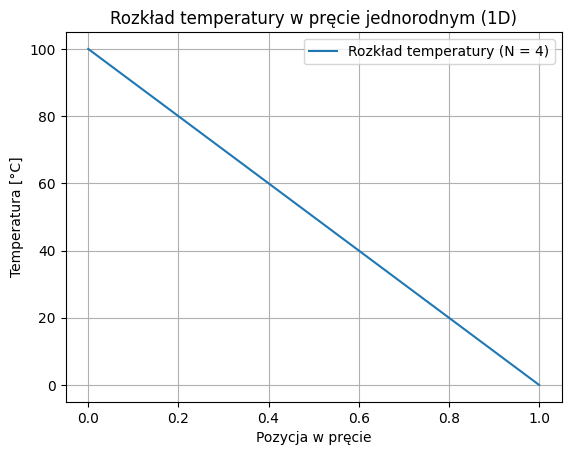

Liczba iteracji: 17
Czas wykonania: 0.0000 s


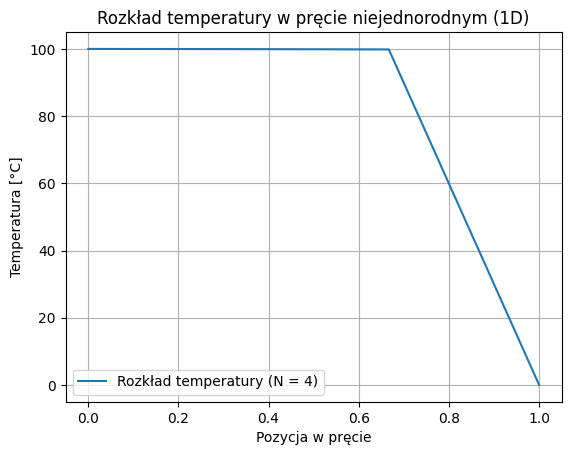

Liczba iteracji: 10000
Czas wykonania: 0.0767 s


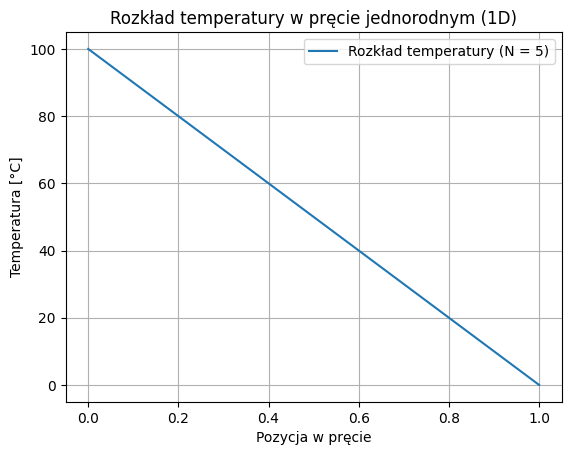

Liczba iteracji: 31
Czas wykonania: 0.0010 s


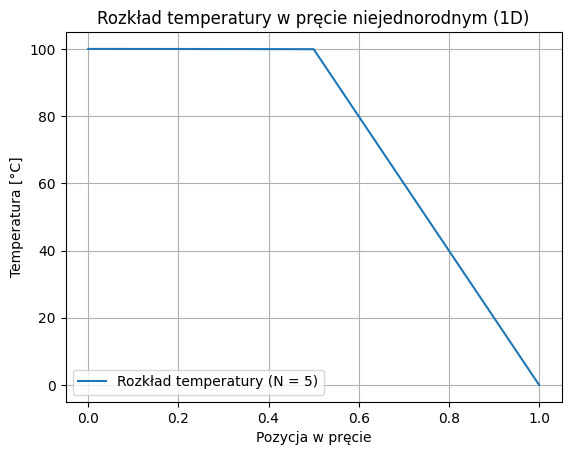

Liczba iteracji: 10000
Czas wykonania: 0.1081 s


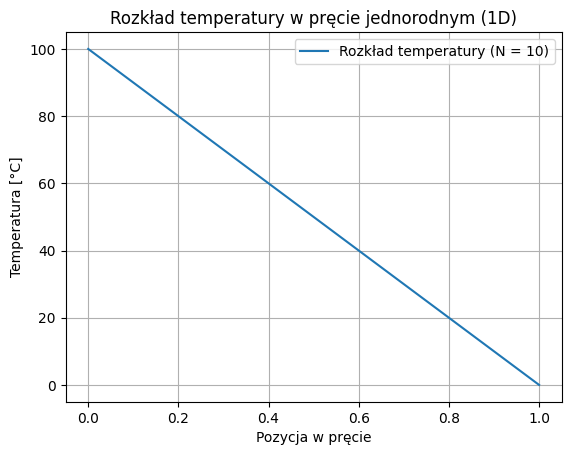

Liczba iteracji: 145
Czas wykonania: 0.0030 s


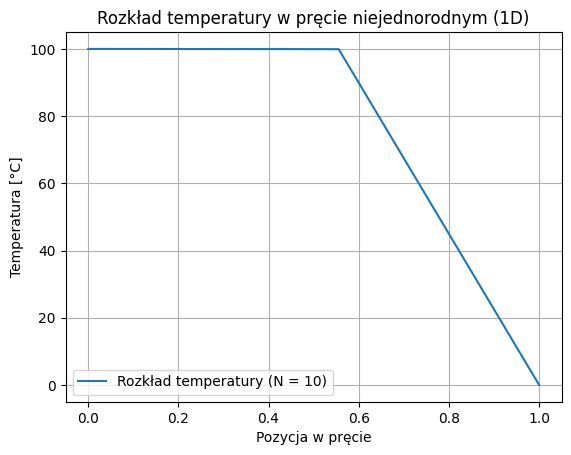

Liczba iteracji: 10000
Czas wykonania: 0.2639 s


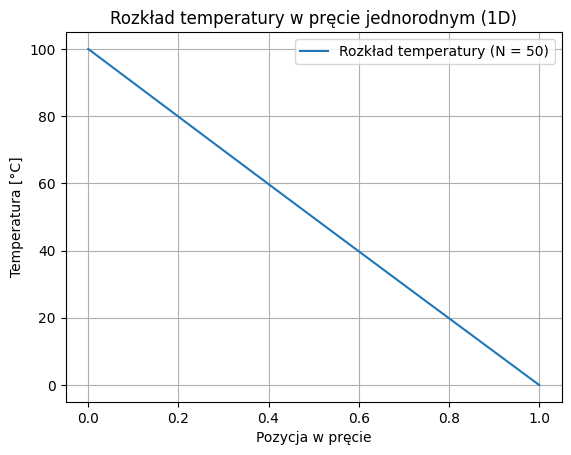

Liczba iteracji: 2708
Czas wykonania: 0.1667 s


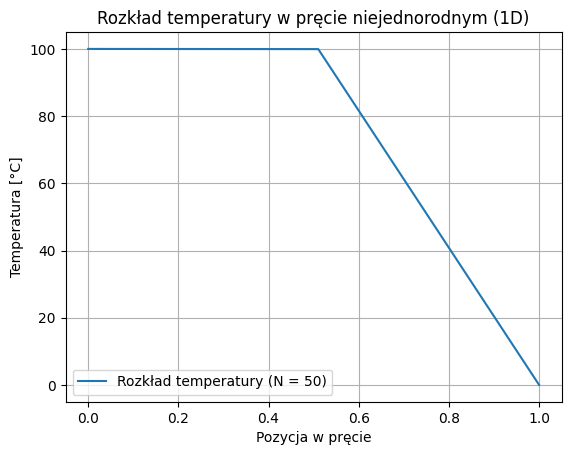

Liczba iteracji: 10000
Czas wykonania: 1.4486 s


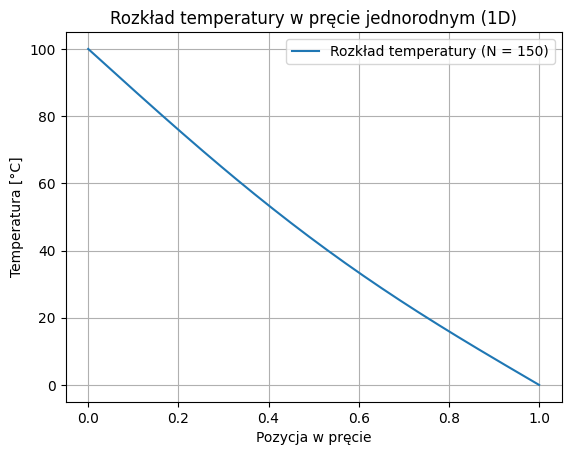

Liczba iteracji: 10000
Czas wykonania: 1.7080 s


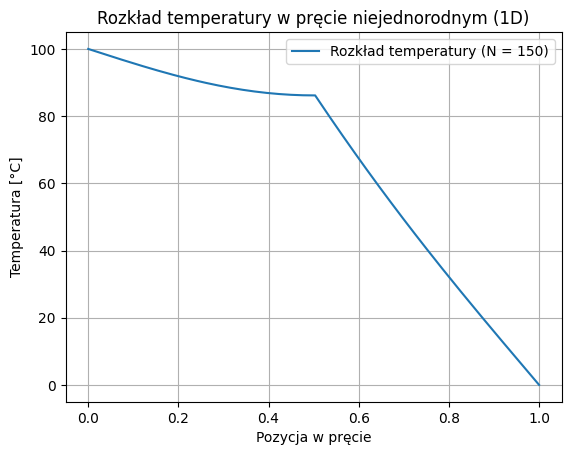

Liczba iteracji: 10000
Czas wykonania: 4.5602 s


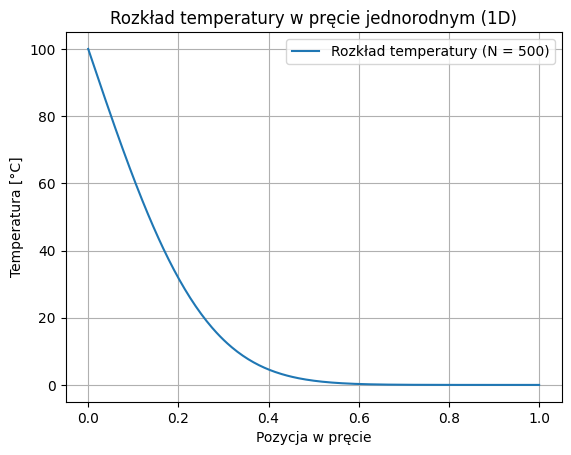

Liczba iteracji: 10000
Czas wykonania: 5.7431 s


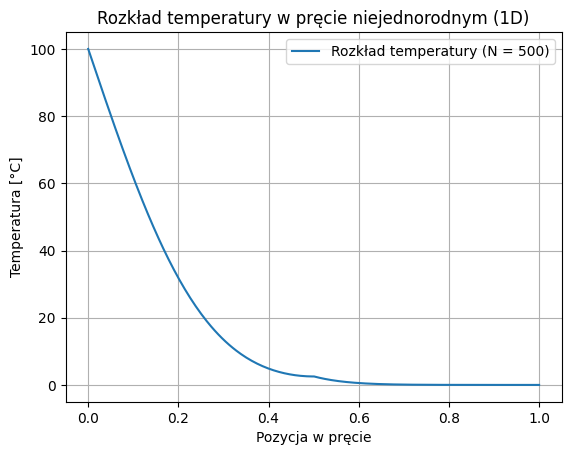

Liczba iteracji: 10000
Czas wykonania: 15.7224 s


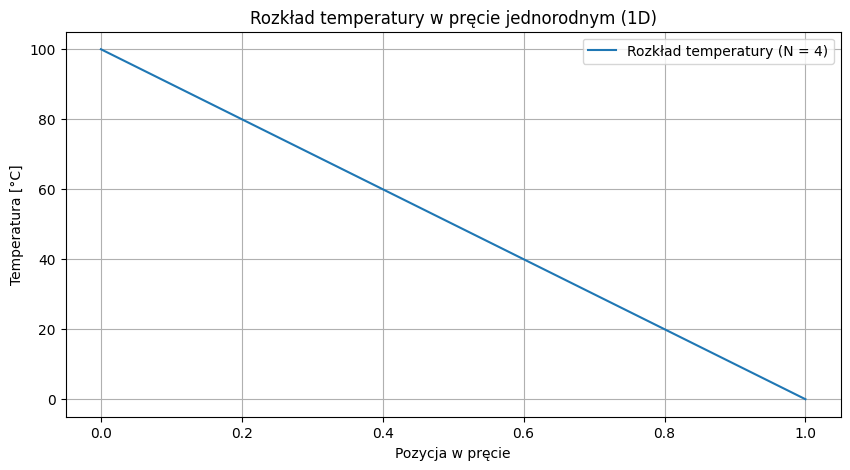

Liczba iteracji: 17
Czas wykonania: 0.0000 s


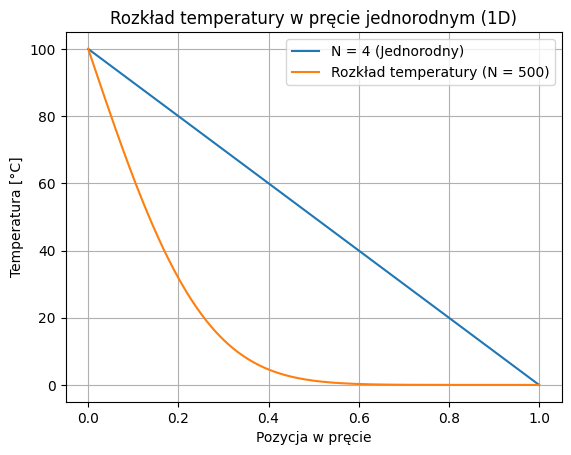

Liczba iteracji: 10000
Czas wykonania: 5.6957 s


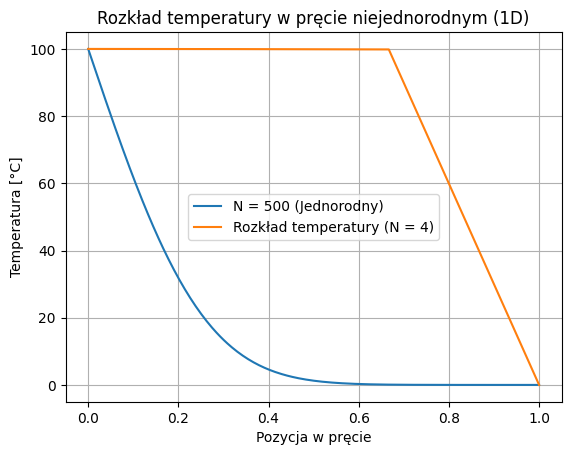

Liczba iteracji: 10000
Czas wykonania: 0.0817 s


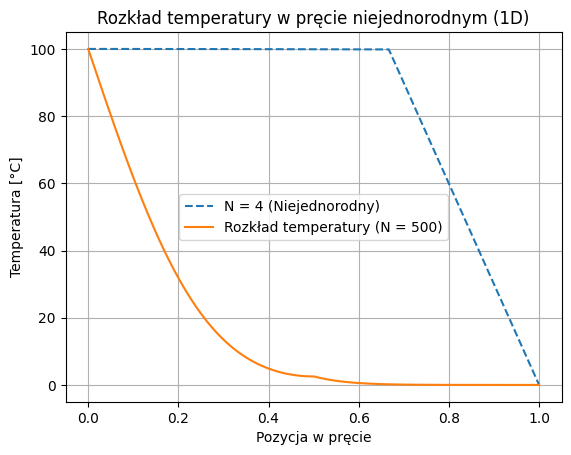

Liczba iteracji: 10000
Czas wykonania: 16.0345 s


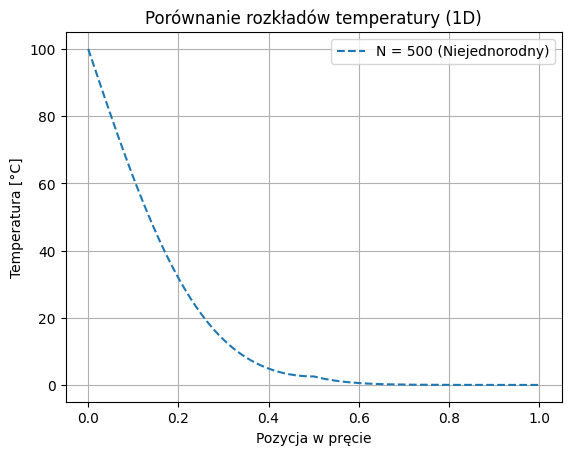

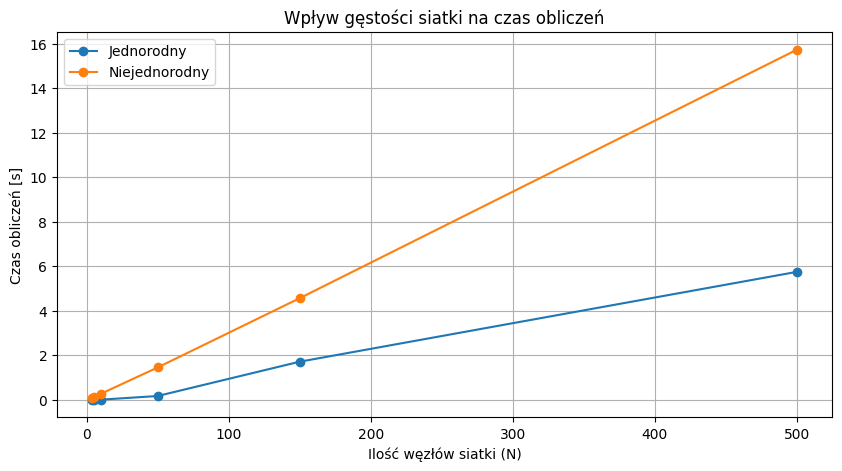


Tabela wyników:
Ilość węzłów siatki N    Czas obliczeń [s] (Jednorodny)     Czas obliczeń [s] (Niejednorodny)  
4                        0.000000                           0.076666                           
5                        0.001043                           0.108116                           
10                       0.003006                           0.263900                           
50                       0.166685                           1.448590                           
150                      1.708027                           4.560214                           
500                      5.743108                           15.722388                          


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

# Parametry testowe
nodes = [4, 5, 10, 50, 150, 500]
times_homogeneous = []
times_nonhomogeneous = []

# Symulacja i zbieranie danych
for N in nodes:
    k_homogeneous = np.full(N, 200.0)  # Stała wartość przewodnictwa
    k_nonhomogeneous = np.array([237.0] * (N // 2) + [0.12] * (N - N // 2))  # Aluminium + Drewno

    _, _, time_h = simulate_heat_transfer_homogeneous1D(N, T0=100, TN=0, k=k_homogeneous)
    _, _, time_nh = simulate_heat_transfer_nonhomogeneous1D(N, T0=100, TN=0, k=k_nonhomogeneous, max_iter=10000)

    times_homogeneous.append(time_h)
    times_nonhomogeneous.append(time_nh)

# Wykres zbiorczy - rozkład temperatury
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0, 1, 4), simulate_heat_transfer_homogeneous1D(4, 100, 0, np.full(4, 200.0))[0], label='N = 4 (Jednorodny)')
plt.plot(np.linspace(0, 1, 500), simulate_heat_transfer_homogeneous1D(500, 100, 0, np.full(500, 200.0))[0], label='N = 500 (Jednorodny)')

plt.plot(np.linspace(0, 1, 4), simulate_heat_transfer_nonhomogeneous1D(4, 100, 0, np.array([237.0] * 2 + [0.12] * 2), max_iter=10000)[0], '--', label='N = 4 (Niejednorodny)')
plt.plot(np.linspace(0, 1, 500), simulate_heat_transfer_nonhomogeneous1D(500, 100, 0, np.array([237.0] * 250 + [0.12] * 250), max_iter=10000)[0], '--', label='N = 500 (Niejednorodny)')

plt.xlabel('Pozycja w pręcie')
plt.ylabel('Temperatura [°C]')
plt.title('Porównanie rozkładów temperatury (1D)')
plt.legend()
plt.grid(True)
plt.show()

# Wykres czasu obliczeń
plt.figure(figsize=(10, 5))
plt.plot(nodes, times_homogeneous, '-o', label='Jednorodny')
plt.plot(nodes, times_nonhomogeneous, '-o', label='Niejednorodny')

plt.xlabel('Ilość węzłów siatki (N)')
plt.ylabel('Czas obliczeń [s]')
plt.title('Wpływ gęstości siatki na czas obliczeń')
plt.legend()
plt.grid(True)
plt.show()

# Wydrukowanie tabeli w konsoli
print("\nTabela wyników:")
print(f"{'Ilość węzłów siatki N':<25}{'Czas obliczeń [s] (Jednorodny)':<35}{'Czas obliczeń [s] (Niejednorodny)':<35}")
print("="*95)

for i in range(len(nodes)):
    print(f"{nodes[i]:<25}{times_homogeneous[i]:<35.6f}{times_nonhomogeneous[i]:<35.6f}")


W przeprowadzonym eksperymencie zauważono, że rozkład temperatury w materiale jednorodnym dla małej liczby węzłów (N = 4) jest liniowy, natomiast w materiale niejednorodnym nieliniowy, co wynika z różnicy we współczynnikach przewodnictwa cieplnego. Dla dużej liczby węzłów (N = 500) rozkład temperatury w obu przypadkach jest zbliżony, z wyraźną krzywizną w materiale niejednorodnym. Czas obliczeń rośnie wraz ze wzrostem liczby węzłów, a dla materiału niejednorodnego jest zauważalnie dłuższy z powodu dodatkowych obliczeń wynikających ze zmiennego współczynnika k. W przypadku dużej liczby węzłów czas obliczeń w materiale niejednorodnym był ponad 2,5 razy dłuższy niż w materiale jednorodnym. Dla prostych analiz mniejsza liczba węzłów może być wystarczająca, natomiast dla większej precyzji konieczne jest zwiększenie gęstości siatki.

Zadanie 2

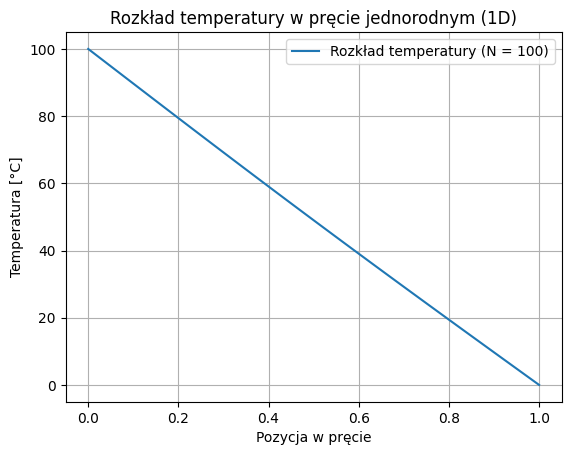

Liczba iteracji: 8263
Czas wykonania: 0.9476 s


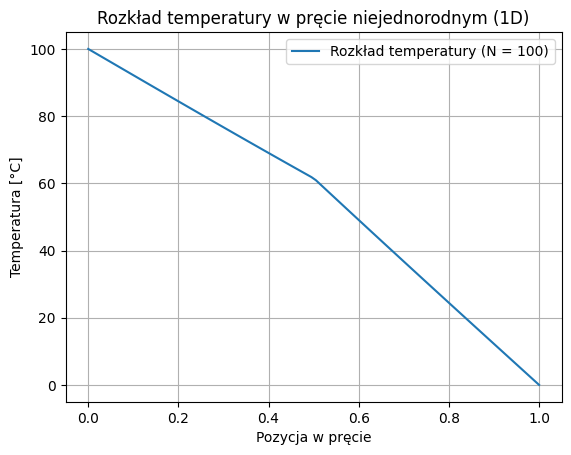

Liczba iteracji: 8706
Czas wykonania: 2.9686 s


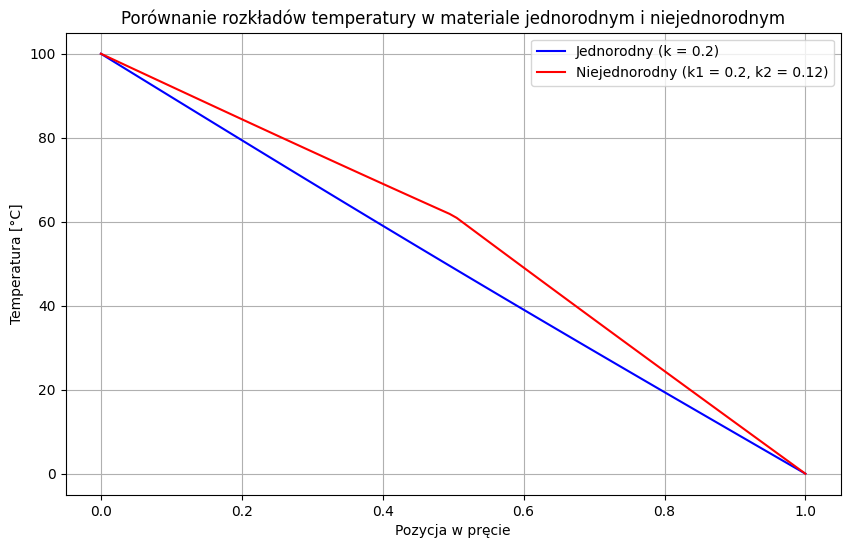

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry symulacji
N = 100
T0 = 100
TN = 0
k_homogeneous = np.full(N, 0.2)  # Materiał jednorodny
k_nonhomogeneous = np.array([0.2] * (N // 2) + [0.12] * (N // 2))  # Materiał niejednorodny

# Maksymalna liczba iteracji i tolerancja
max_iter = 10000
tolerance = 0.001

# Obliczenia
temperature_homogeneous, _, _ = simulate_heat_transfer_homogeneous1D(N, T0, TN, k_homogeneous, max_iter, tolerance)
temperature_nonhomogeneous, _, _ = simulate_heat_transfer_nonhomogeneous1D(N, T0, TN, k_nonhomogeneous, max_iter, tolerance)

# Wykres porównawczy
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, 1, N), temperature_homogeneous, label='Jednorodny (k = 0.2)', color='blue')
plt.plot(np.linspace(0, 1, N), temperature_nonhomogeneous, label='Niejednorodny (k1 = 0.2, k2 = 0.12)', color='red')
plt.xlabel('Pozycja w pręcie')
plt.ylabel('Temperatura [°C]')
plt.title('Porównanie rozkładów temperatury w materiale jednorodnym i niejednorodnym')
plt.legend()
plt.grid(True)
plt.show()


W materiale jednorodnym rozkład temperatury jest liniowy, co wynika z jednolitego współczynnika przewodnictwa cieplnego. W materiale niejednorodnym rozkład temperatury jest nieliniowy, a zmiana tempa spadku temperatury widoczna jest w miejscu przejścia z materiału o przewodnictwie k1 = 0.2 na materiał o przewodnictwie k2 = 0.12. Przewodnictwo cieplne w drugiej części pręta jest mniejsze, co powoduje wolniejszy spadek temperatury w tej części. Liczba iteracji oraz czas obliczeń w przypadku materiału niejednorodnego są większe ze względu na dodatkowe obliczenia związane z różnymi wartościami współczynnika k.

Zadanie 3

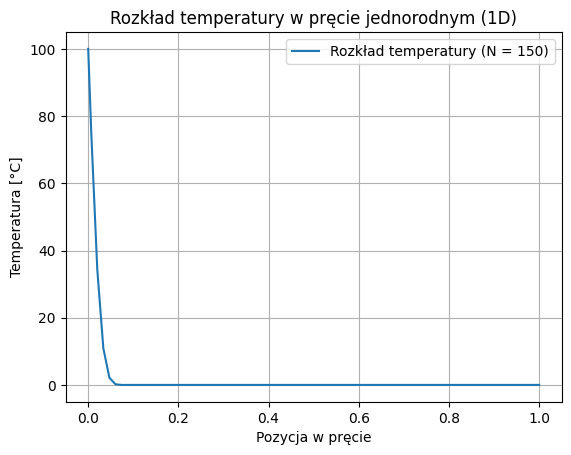

Liczba iteracji: 10
Czas wykonania: 0.0027 s


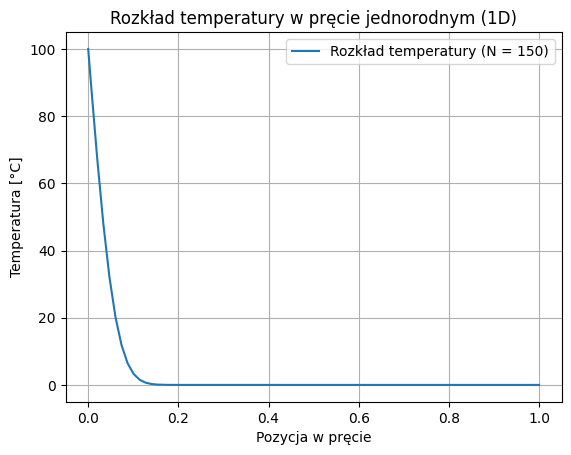

Liczba iteracji: 50
Czas wykonania: 0.0091 s


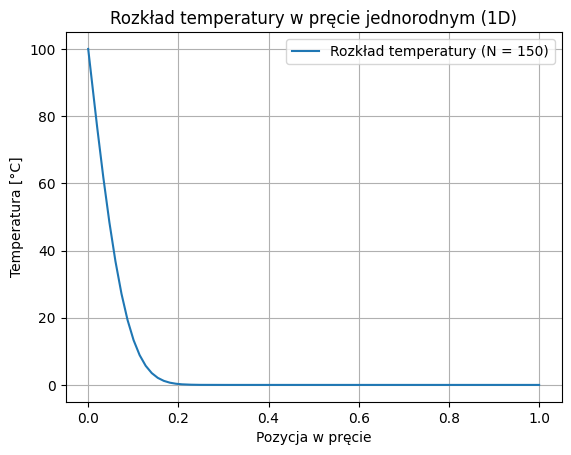

Liczba iteracji: 100
Czas wykonania: 0.0232 s


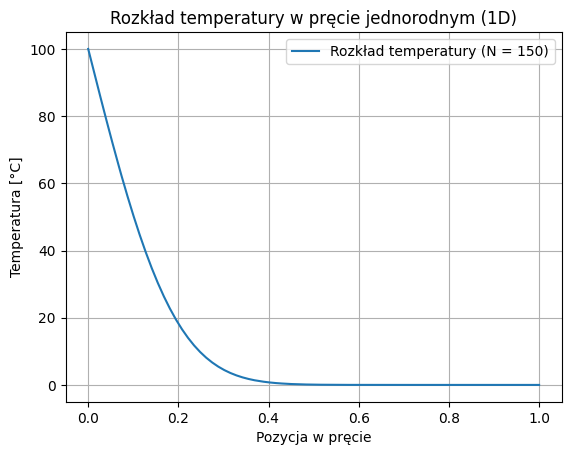

Liczba iteracji: 500
Czas wykonania: 0.0844 s


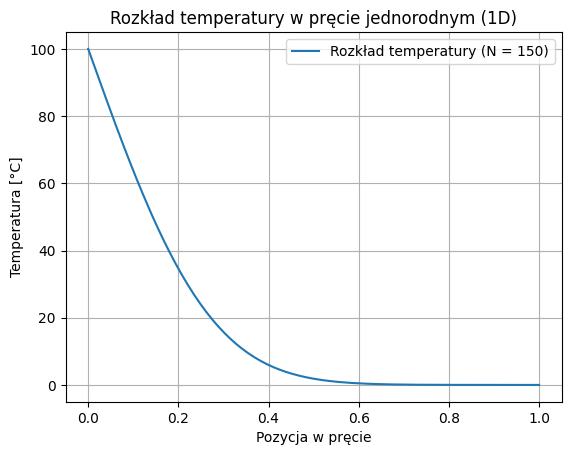

Liczba iteracji: 1000
Czas wykonania: 0.1750 s


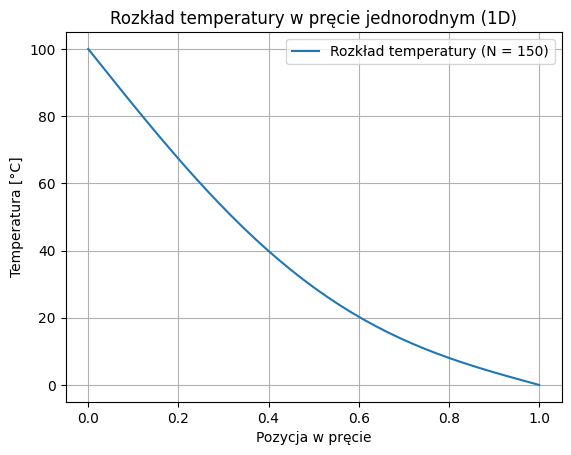

Liczba iteracji: 5000
Czas wykonania: 0.8475 s


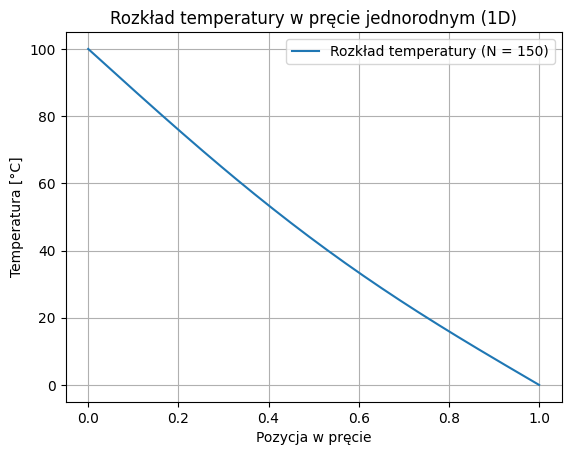

Liczba iteracji: 10000
Czas wykonania: 1.8228 s


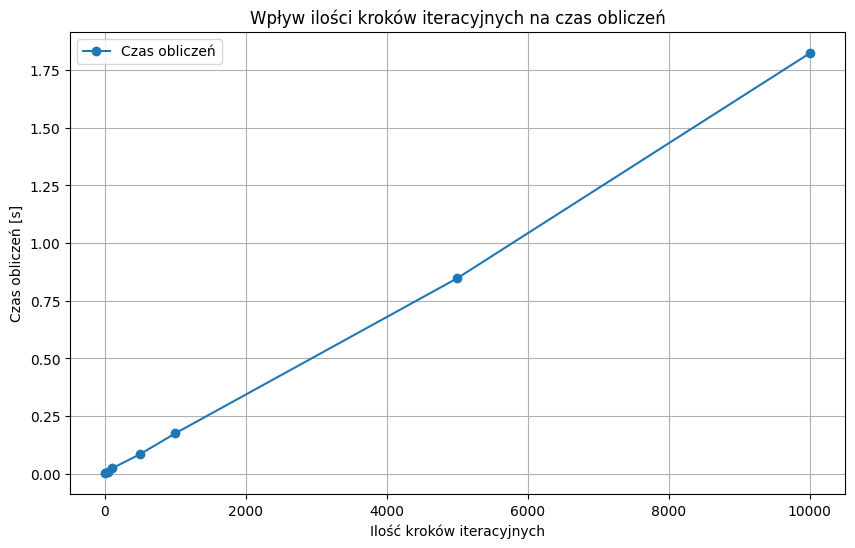


Tabela wyników:
Ilość kroków        Czas obliczeń [s]   
10                  0.002682            
50                  0.009050            
100                 0.023184            
500                 0.084446            
1000                0.174953            
5000                0.847457            
10000               1.822825            


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Parametry symulacji
N = 150
T0 = 100
TN = 0
k_homogeneous = np.full(N, 0.2)  # Materiał jednorodny
tolerance = 0.001

# Lista ilości kroków iteracyjnych do przetestowania
iteration_steps = [10, 50, 100, 500, 1000, 5000, 10000]
times = []

# Przeprowadzenie symulacji
for steps in iteration_steps:
    start_time = time.time()
    _, _, exec_time = simulate_heat_transfer_homogeneous1D(N, T0, TN, k_homogeneous, max_iter=steps, tolerance=tolerance)
    times.append(exec_time)

# Wykres zależności
plt.figure(figsize=(10, 6))
plt.plot(iteration_steps, times, '-o', label='Czas obliczeń')
plt.xlabel('Ilość kroków iteracyjnych')
plt.ylabel('Czas obliczeń [s]')
plt.title('Wpływ ilości kroków iteracyjnych na czas obliczeń')
plt.grid(True)
plt.legend()
plt.show()

# Tabela wyników
print("\nTabela wyników:")
print(f"{'Ilość kroków':<20}{'Czas obliczeń [s]':<20}")
print("="*40)

for i in range(len(iteration_steps)):
    print(f"{iteration_steps[i]:<20}{times[i]:<20.6f}")


Czas obliczeń rośnie liniowo wraz ze wzrostem liczby kroków iteracyjnych, co jest zgodne z oczekiwaniami. Wzrost liczby iteracji prowadzi do większej dokładności rozwiązania, jednak znacząco zwiększa czas potrzebny na obliczenia. Początkowo wzrost jest niewielki, ale przy dużej liczbie iteracji (np. 5000 i 10000) czas obliczeń rośnie proporcjonalnie szybciej. Ostatecznie zależność ta ma charakter liniowy, co potwierdza wykres.

Zadanie 4

In [4]:
#Ponowna definicja wszsytkich funkcji aby zniwelować błąd nadpisania
def simulate_heat_transfer_1D(N, T0, TN, k_values, max_iter=10000, tolerance=0.01):
    # Inicjalizacja temperatury w węzłach
    temperatures = np.zeros(N)
    temperatures[0] = T0  # Warunek brzegowy - lewy koniec
    temperatures[-1] = TN  # Warunek brzegowy - prawy koniec
    
    # Pomiar czasu rozpoczęcia symulacji
    start_time = time.time()
    iteration_times = []  # Lista do przechowywania czasu każdej iteracji

    for iteration in range(max_iter):
        iter_start = time.time()  # Czas rozpoczęcia iteracji
        new_temperatures = temperatures.copy()
        
        # Aktualizacja temperatury w punktach wewnętrznych
        for i in range(1, N - 1):
            k_left = (k_values[i] + k_values[i - 1]) / 2  # Średnie przewodnictwo cieplne na lewo
            k_right = (k_values[i] + k_values[i + 1]) / 2  # Średnie przewodnictwo cieplne na prawo
            
            new_temperatures[i] = (k_right * temperatures[i + 1] + k_left * temperatures[i - 1]) / (k_left + k_right)
        
        # Pomiar czasu iteracji
        iter_time = time.time() - iter_start
        iteration_times.append(iter_time)
        
        # Kryterium zbieżności
        max_difference = np.max(np.abs(new_temperatures - temperatures))
        if max_difference < tolerance:
            temperatures = new_temperatures
            elapsed_time = time.time() - start_time
            avg_iteration_time = sum(iteration_times) / len(iteration_times)
            return temperatures, elapsed_time, avg_iteration_time, iteration + 1
        
        temperatures = new_temperatures
    
    elapsed_time = time.time() - start_time
    avg_iteration_time = sum(iteration_times) / len(iteration_times)
    return temperatures, elapsed_time, avg_iteration_time, max_iter



def plot_temperature_distribution_1D(temperatures):
    plt.figure(figsize=(8, 5))
    plt.plot(range(len(temperatures)), temperatures, marker='o', linestyle='-')
    plt.xlabel("Numer węzła")
    plt.ylabel("Temperatura [°C]")
    plt.title("Rozkład temperatury w pręcie")
    plt.grid(True)
    plt.show()
    
    
def simulate_heat_transfer_nonhomogeneous2D(Nx, Ny, TU, TD, TL, TR, k_values, max_iter=10000, tolerance=0.01):
    temperatures = np.zeros((Ny, Nx))
    temperatures[0, :] = TU  
    temperatures[-1, :] = TD 
    temperatures[:, 0] = TL  
    temperatures[:, -1] = TR 
    
    for iteration in range(max_iter):
        new_temperatures = temperatures.copy()
        for i in range(1, Ny - 1):
            for j in range(1, Nx - 1):
                k_x_left = (k_values[i, j] + k_values[i, j - 1]) / 2
                k_x_right = (k_values[i, j] + k_values[i, j + 1]) / 2
                k_y_up = (k_values[i, j] + k_values[i - 1, j]) / 2
                k_y_down = (k_values[i, j] + k_values[i + 1, j]) / 2
                
                new_temperatures[i, j] = (
                    k_x_right * temperatures[i, j + 1] + k_x_left * temperatures[i, j - 1] +
                    k_y_up * temperatures[i - 1, j] + k_y_down * temperatures[i + 1, j]
                ) / (k_x_left + k_x_right + k_y_up + k_y_down)
        
        if np.max(np.abs(new_temperatures - temperatures)) < tolerance:
            return new_temperatures
        temperatures = new_temperatures
    
    return temperatures



def plot_temperature_distribution_2D(temperatures):
    plt.figure(figsize=(8, 6))
    plt.imshow(temperatures, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Temperatura [°C]')
    plt.title("Rozkład temperatury w materiale")
    plt.xlabel("Indeks X")
    plt.ylabel("Indeks Y")
    plt.show()

import numpy as np
import matplotlib.pyplot as plt
import time
def simulate_heat_transfer_nonhomogeneous1D(N, T0, TN, k_values, max_iter=10000, tolerance=0.01):
    temperatures = np.zeros(N)
    temperatures[0] = T0  
    temperatures[-1] = TN  
    
    for iteration in range(max_iter):
        new_temperatures = temperatures.copy()
        for i in range(1, N - 1):
            k_left = (k_values[i] + k_values[i - 1]) / 2  
            k_right = (k_values[i] + k_values[i + 1]) / 2  
            new_temperatures[i] = (k_right * temperatures[i + 1] + k_left * temperatures[i - 1]) / (k_left + k_right)
        
        if np.max(np.abs(new_temperatures - temperatures)) < tolerance:
            return new_temperatures, iteration + 1  # Zwracamy temperatury oraz liczbę iteracji

        temperatures = new_temperatures
    
    return temperatures, max_iter  # Jeśli nie osiągnie zbieżności, zwracamy maksymalną liczbę iteracji


def plot_temperature_distribution_2D(temperatures):
    plt.figure(figsize=(8, 6))
    plt.imshow(temperatures, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Temperatura [°C]')
    plt.title("Rozkład temperatury w materiale")
    plt.xlabel("Indeks X")
    plt.ylabel("Indeks Y")
    plt.show()




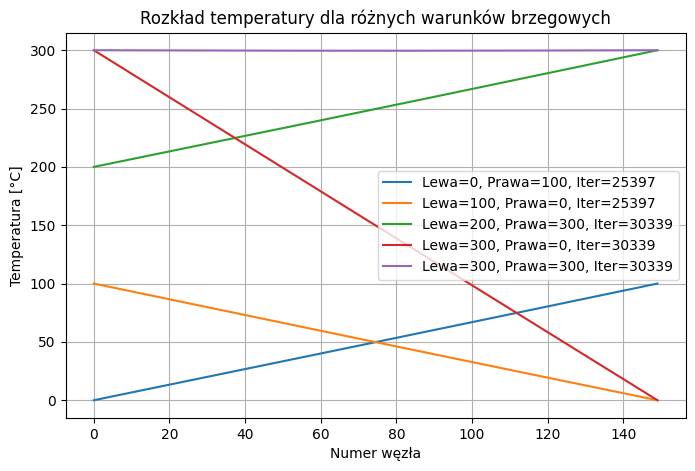


Tabela wyników wpływu warunków brzegowych na rozkład temperatury:
 Lewa strona  Prawa strona  Ilość iteracji
           0           100           25397
         100             0           25397
         200           300           30339
         300             0           30339
         300           300           30339


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Parametry symulacji
N = 150  # Stała liczba węzłów siatki
max_iter = 100000
tolerance = 0.0001
k_value = 0.2  # Jednorodny materiał

# Warunki brzegowe do testów
boundary_conditions = [
    (0, 100),
    (100, 0),
    (200, 300),
    (300, 0),
    (300, 300)
]

# Macierz współczynnika przewodnictwa cieplnego (stałe k)
k_homogeneous = np.ones(N) * k_value

# Lista do przechowywania wyników
results = []

# Wykonanie testów dla różnych warunków brzegowych
plt.figure(figsize=(8, 5))

for T_left, T_right in boundary_conditions:
    # Uruchomienie symulacji
    temperatures, num_iterations = simulate_heat_transfer_nonhomogeneous1D(N, T_left, T_right, k_homogeneous, max_iter, tolerance)

    results.append((T_left, T_right, num_iterations))

    # Rysowanie wykresu temperatury dla różnych warunków brzegowych
    plt.plot(range(N), temperatures, label=f"Lewa={T_left}, Prawa={T_right}, Iter={num_iterations}")

plt.xlabel("Numer węzła")
plt.ylabel("Temperatura [°C]")
plt.title("Rozkład temperatury dla różnych warunków brzegowych")
plt.legend()
plt.grid(True)
plt.show()

# Tworzenie tabeli wyników
df_results = pd.DataFrame(results, columns=["Lewa strona", "Prawa strona", "Ilość iteracji"])

# Wyświetlenie wyników w czytelnej formie
print("\nTabela wyników wpływu warunków brzegowych na rozkład temperatury:")
print(df_results.to_string(index=False))


Rozkład temperatury w pręcie jest zależny od warunków brzegowych. Im większa różnica temperatur na końcach, tym bardziej stromy gradient i szybsza stabilizacja układu. Przypadki z dużą różnicą temperatur (np. 0-100, 100-0) osiągnęły stabilizację szybciej (25397 iteracji), natomiast układy z bardziej "ekstremalnymi" wartościami brzegowymi (np. 200-300, 300-0, 300-300) wymagały większej liczby iteracji (30339 iteracji). Warto zauważyć, że przypadek z równymi temperaturami po obu stronach (300-300) stabilizował się równie długo co układ z dużą różnicą temperatur (300-0), co sugeruje, że wysokie temperatury mogą wydłużać czas osiągnięcia stanu stacjonarnego.

Zadanie 5

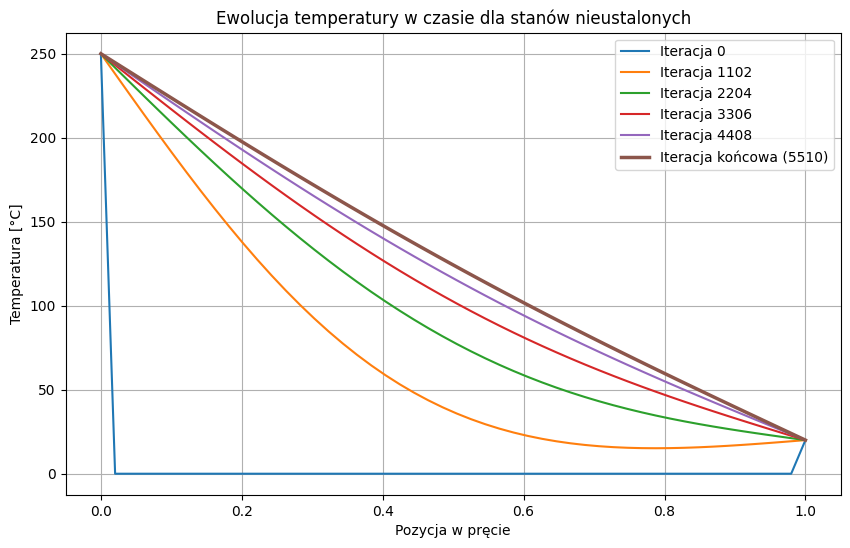

Liczba iteracji potrzebna do osiągnięcia zbieżności: 5510
Czas wykonania symulacji: 0.0440 s


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Funkcja dla pręta jednorodnego z dodatkowymi danymi o ewolucji temperatury
def simulate_heat_transfer_homogeneous1D(N, T0, TN, k, max_iter=10000, tolerance=0.01):
    temperatures = np.zeros(N)
    temperatures[0] = T0
    temperatures[-1] = TN

    start_time = time.time()
    history = []  # Do przechowywania przebiegu temperatury

    for iter_count in range(1, max_iter + 1):
        prev_temperatures = temperatures.copy()
        temperatures[1:-1] = 0.5 * (prev_temperatures[0:-2] + prev_temperatures[2:])

        history.append(temperatures.copy())

        # Warunek zbieżności
        if np.max(np.abs(temperatures - prev_temperatures)) < tolerance:
            break

    exec_time = time.time() - start_time
    return temperatures, iter_count, exec_time, history

# Parametry zgodne z treścią zadania
N = 100
T_lewa = 250
T_prawa = 20
k_homogeneous = np.full(N, 0.2)  # Materiał jednorodny
tolerance = 1e-2

#Symulacja
temperatures, total_iterations, exec_time, history = simulate_heat_transfer_homogeneous1D(
    N, T_lewa, T_prawa, k_homogeneous, max_iter=10000, tolerance=tolerance
)

# Podział iteracji na 5 równych części
step = total_iterations // 5

#Wizualizacja wyników w różnych krokach czasowych
plt.figure(figsize=(10, 6))
for i in range(0, total_iterations, step):
    plt.plot(np.linspace(0, 1, N), history[i], label=f'Iteracja {i}')

#Dodanie końcowego rozkładu temperatury
plt.plot(np.linspace(0, 1, N), temperatures, label=f'Iteracja końcowa ({total_iterations})', linewidth=2.5)

#Finalne ustawienia wykresu
plt.xlabel('Pozycja w pręcie')
plt.ylabel('Temperatura [°C]')
plt.title('Ewolucja temperatury w czasie dla stanów nieustalonych')
plt.legend()
plt.grid(True)
plt.show()

#Wyniki końcowe
print(f"Liczba iteracji potrzebna do osiągnięcia zbieżności: {total_iterations}")
print(f"Czas wykonania symulacji: {exec_time:.4f} s")


W początkowych iteracjach rozkład temperatury wykazuje gwałtowne zmiany, co oznacza dynamiczne dostosowywanie się temperatury w materiale. W miarę postępu kolejnych iteracji zmiany stają się coraz łagodniejsze, a rozkład temperatury zaczyna przybierać bardziej stabilną formę. Ostatecznie, po około 5510 iteracjach, osiągnięto stan ustalony, w którym rozkład temperatury jest stabilny i nie ulega dalszym zmianom.
Proces stabilizacji przebiega początkowo szybko, ale zbliżając się do wartości końcowej, tempo zmian maleje. Stabilność osiągnięto po osiągnięciu warunku zbieżności przy tolerancji 𝜀 = 10⁻² °C.
Taki proces jest charakterystyczny dla systemów termicznych, gdzie początkowa wymiana ciepła jest intensywna, a następnie energia cieplna rozkłada się równomiernie, prowadząc do ustalonego stanu równowagi.

Zadanie 6

Rozpoczynanie testów dla różnych rozmiarów siatki 2D...


Postęp symulacji:   0%|          | 0/6 [00:00<?, ?test/s]

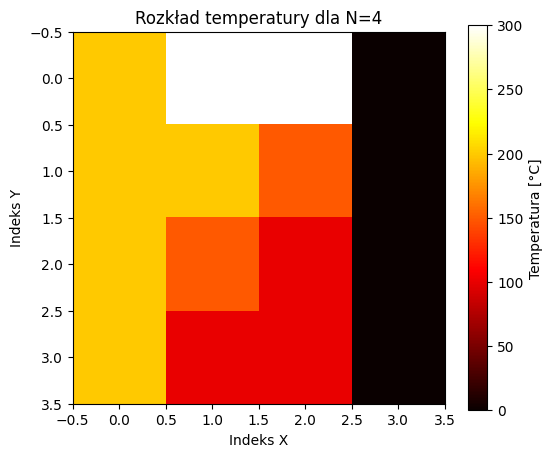

Postęp symulacji:  83%|████████▎ | 5/6 [00:59<00:16, 16.03s/test]

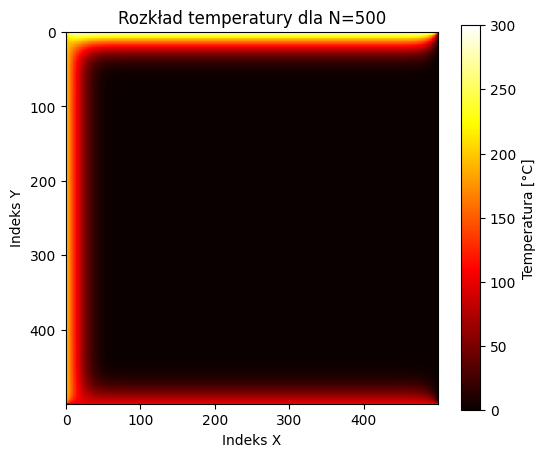

Postęp symulacji: 100%|██████████| 6/6 [11:00<00:00, 110.07s/test]

Symulacje zakończone. Generowanie wykresów...


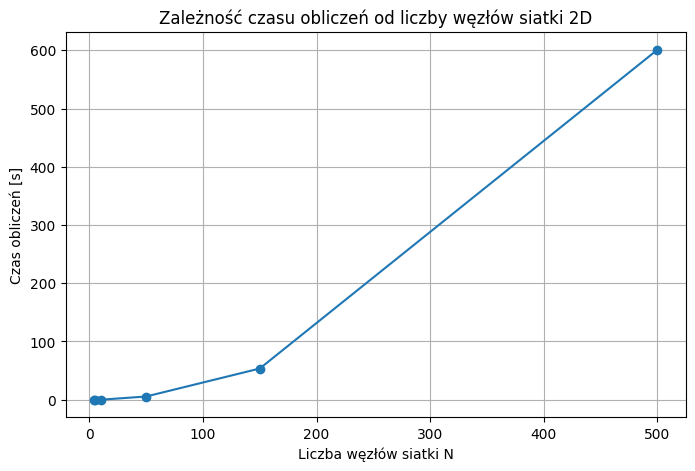


Tabela wyników testów gęstości siatki w 2D:
 Ilość węzłów siatki N  Całkowity czas obliczeń [s]
                     4                     0.000000
                     5                     0.000999
                    10                     0.019030
                    50                     5.531971
                   150                    53.563491
                   500                   600.942924


In [7]:

from tqdm import tqdm  # Biblioteka do wyświetlania paska postępu

# Funkcja do symulacji 2D z wyświetlaniem progressu
def run_test_2D():
    grid_sizes = [4, 5, 10, 50, 150, 500]  # Ilość węzłów siatki w obu wymiarach
    TU, TD, TL, TR = 300, 100, 200, 0  # Warunki brzegowe
    kal = 237.0  # Przewodność cieplna
    max_iter = 1000  # Maksymalna liczba iteracji

    results = []

    print("Rozpoczynanie testów dla różnych rozmiarów siatki 2D...")

    for N in tqdm(grid_sizes, desc="Postęp symulacji", unit="test"):
        # Tworzenie jednorodnej siatki przewodnictwa cieplnego
        k_values_2D = np.ones((N, N)) * kal
        
        # Pomiar czasu wykonania
        start_time = time.time()
        temperatures = simulate_heat_transfer_nonhomogeneous2D(N, N, TU, TD, TL, TR, k_values_2D, max_iter)
        elapsed_time = time.time() - start_time

        results.append((N, elapsed_time))

        # Zapisywanie wyników dla pierwszej i ostatniej wartości siatki (N=4 i N=500)
        if N == 4 or N == 500:
            plt.figure(figsize=(6, 5))
            plt.imshow(temperatures, cmap='hot', interpolation='nearest')
            plt.colorbar(label='Temperatura [°C]')
            plt.title(f"Rozkład temperatury dla N={N}")
            plt.xlabel("Indeks X")
            plt.ylabel("Indeks Y")
            plt.show()

    print("Symulacje zakończone. Generowanie wykresów...")

    # Tworzenie wykresu zależności czasu od liczby węzłów siatki
    sizes, times = zip(*results)
    plt.figure(figsize=(8, 5))
    plt.plot(sizes, times, marker='o', linestyle='-')
    plt.xlabel("Liczba węzłów siatki N")
    plt.ylabel("Czas obliczeń [s]")
    plt.title("Zależność czasu obliczeń od liczby węzłów siatki 2D")
    plt.grid(True)
    plt.show()

    # Tworzenie tabeli wyników
    df_results = pd.DataFrame(results, columns=["Ilość węzłów siatki N", "Całkowity czas obliczeń [s]"])

    # Wyświetlenie tabeli wyników w formie czytelnej w terminalu
    print("\nTabela wyników testów gęstości siatki w 2D:")
    print(df_results.to_string(index=False))

    return df_results

# Uruchomienie testu
df_test_results_2D = run_test_2D()


Wraz ze wzrostem liczby węzłów siatki czas obliczeń znacząco rośnie. Przy niewielkich siatkach (np. 4x4 lub 5x5) czas obliczeń jest praktycznie pomijalny. Jednak przy gęstszych siatkach (np. 150x150 lub 500x500) czas obliczeń gwałtownie wzrasta, osiągając nawet kilkaset sekund. Zależność ta jest zbliżona do wykładniczej, gdzie liczba obliczeń rośnie kwadratowo wraz ze wzrostem liczby punktów siatki. Warto więc dobierać rozdzielczość siatki odpowiednio do wymaganej dokładności i dostępnych zasobów obliczeniowych.

Zadanie 7

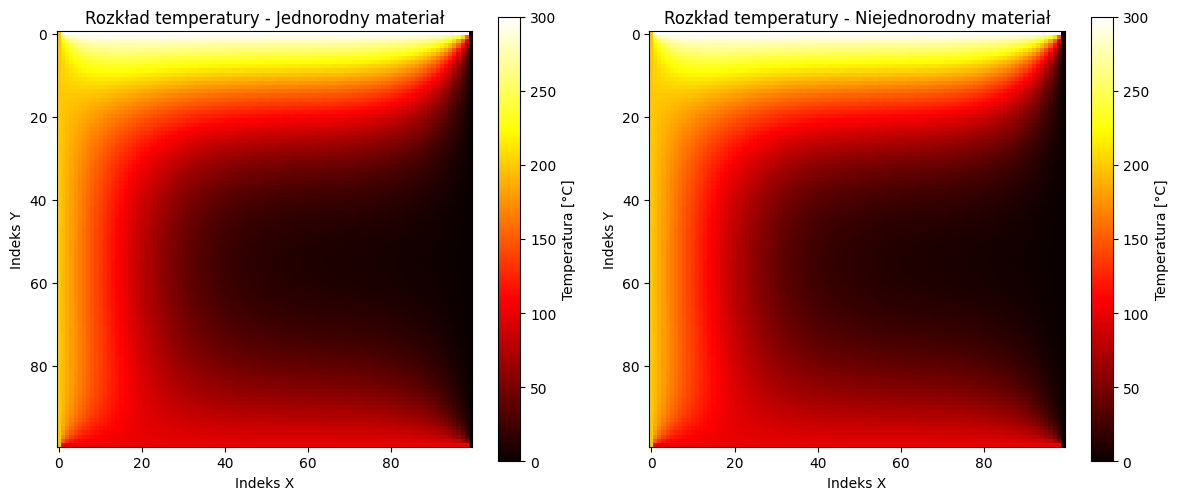

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry symulacji
Nx, Ny = 100, 100  # Rozmiar siatki
TU, TD, TL, TR = 300, 100, 200, 0  # Warunki brzegowe
max_iter = 1000  # Maksymalna liczba iteracji
tolerance = 0.001  # Kryterium zbieżności

# Definiowanie jednorodnej i niejednorodnej przewodności cieplnej
k_homogeneous = np.ones((Ny, Nx)) * 0.2  # Stała przewodność cieplna

k_heterogeneous = np.ones((Ny, Nx))
k_heterogeneous[:, :Nx//2] = 0.2  # Lewa połowa siatki ma k1
k_heterogeneous[:, Nx//2:] = 0.12  # Prawa połowa siatki ma k2

# Obliczenie temperatury dla jednorodnego materiału
temperatures_homogeneous = simulate_heat_transfer_nonhomogeneous2D(Nx, Ny, TU, TD, TL, TR, k_homogeneous, max_iter, tolerance)

# Obliczenie temperatury dla niejednorodnego materiału
temperatures_heterogeneous = simulate_heat_transfer_nonhomogeneous2D(Nx, Ny, TU, TD, TL, TR, k_heterogeneous, max_iter, tolerance)

# Wizualizacja porównawcza rozkładów temperatury
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Jednorodny przypadek
im1 = axes[0].imshow(temperatures_homogeneous, cmap='hot', interpolation='nearest')
axes[0].set_title("Rozkład temperatury - Jednorodny materiał")
axes[0].set_xlabel("Indeks X")
axes[0].set_ylabel("Indeks Y")
plt.colorbar(im1, ax=axes[0], label="Temperatura [°C]")

# Niejednorodny przypadek
im2 = axes[1].imshow(temperatures_heterogeneous, cmap='hot', interpolation='nearest')
axes[1].set_title("Rozkład temperatury - Niejednorodny materiał")
axes[1].set_xlabel("Indeks X")
axes[1].set_ylabel("Indeks Y")
plt.colorbar(im2, ax=axes[1], label="Temperatura [°C]")

plt.tight_layout()
plt.show()


Rozkład temperatury w materiale jednorodnym jest symetryczny i równomierny, podczas gdy w materiale niejednorodnym gradient temperatury jest większy po stronie o niższym współczynniku przewodnictwa cieplnego, co potwierdza wpływ różnych właściwości materiałowych na rozkład ciepła.

Zadanie 8

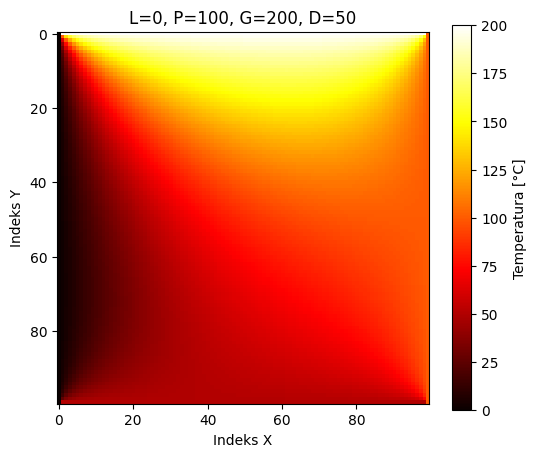

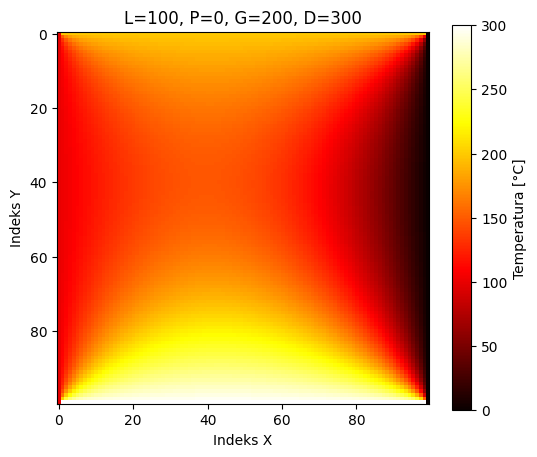

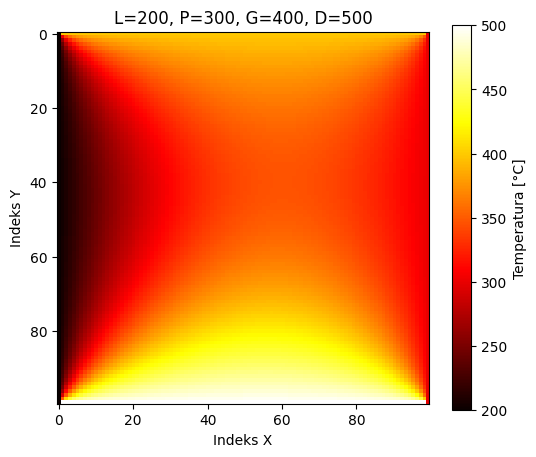

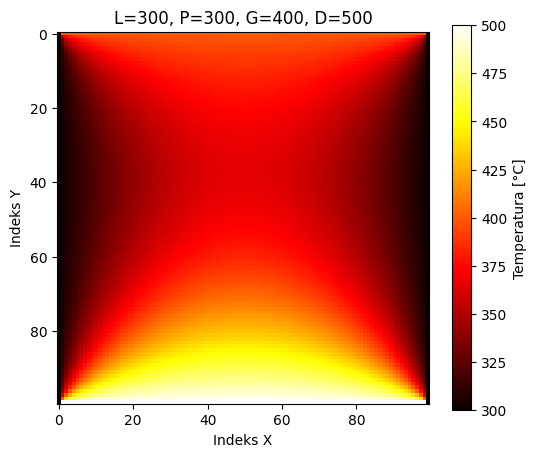

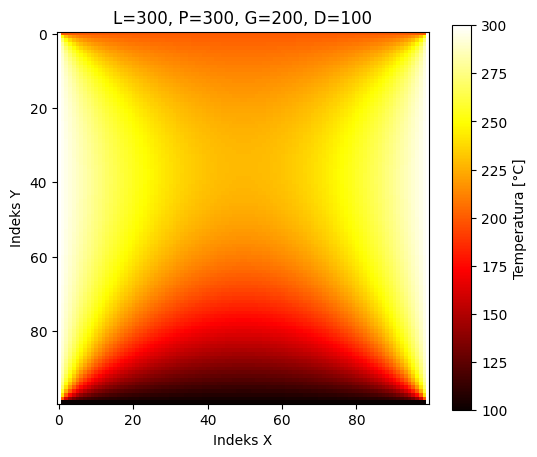


Tabela wyników wpływu warunków brzegowych na rozkład temperatury:
 Lewa strona  Prawa strona  Góra  Dół
           0           100   200   50
         100             0   200  300
         200           300   400  500
         300           300   400  500
         300           300   200  100


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Stałe parametry symulacji
Nx, Ny = 100, 100
max_iter = 10000
tolerance = 0.001
kal = 237.0

# Lista warunków brzegowych do testów
boundary_conditions = [
    (0, 100, 200, 50),
    (100, 0, 200, 300),
    (200, 300, 400, 500),
    (300, 300, 400, 500),
    (300, 300, 200, 100)
]

# Lista wyników
results = []

# Wykonanie testów i rysowanie wykresów osobno
for i, (TL, TR, TU, TD) in enumerate(boundary_conditions):
    k_values_2D = np.ones((Ny, Nx)) * kal
    temperatures = simulate_heat_transfer_nonhomogeneous2D(Nx, Ny, TU, TD, TL, TR, k_values_2D, max_iter, tolerance)

    # Zapis wyników
    results.append((TL, TR, TU, TD))

    # Wykres dla każdej konfiguracji w osobnym oknie
    plt.figure(figsize=(6, 5))
    plt.imshow(temperatures, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Temperatura [°C]')
    plt.title(f"L={TL}, P={TR}, G={TU}, D={TD}")
    plt.xlabel("Indeks X")
    plt.ylabel("Indeks Y")
    plt.show()

# Tworzenie tabeli wyników
df_results = pd.DataFrame(results, columns=["Lewa strona", "Prawa strona", "Góra", "Dół"])

# Wyświetlenie tabeli wyników
print("\nTabela wyników wpływu warunków brzegowych na rozkład temperatury:")
print(df_results.to_string(index=False))

# Opcjonalnie: Zapis do pliku CSV
df_results.to_csv("wyniki_warunki_brzegowe.csv", index=False)


Rozkład temperatury znacząco różni się w zależności od wartości temperatury przypisanej do poszczególnych krawędzi. Wysoka temperatura na jednej z krawędzi skutkuje większym gradientem cieplnym w jej pobliżu.
W przypadkach z identycznymi temperaturami po obu stronach (np. TL = TR, TU = TD), rozkład temperatury wykazuje symetrię, co sugeruje równomierne rozchodzenie się ciepła.
Im większa różnica temperatur pomiędzy przeciwległymi krawędziami, tym bardziej zróżnicowany gradient temperatury obserwujemy w centralnej części siatki.
Największe skoki temperatur widoczne są w przypadkach, gdy skrajne warunki brzegowe różnią się znacząco (np. 0°C vs 300°C).
Wysoka temperatura na jednej z krawędzi (np. TU = 400°C) sprawia, że ciepło intensywniej rozchodzi się w stronę przeciwnych krawędzi, co prowadzi do bardziej wyraźnych stref przejściowych.

Podsumowując, warunki brzegowe istotnie wpływają na rozkład temperatury, a różnice w temperaturach na przeciwległych krawędziach prowadzą do zróżnicowanych gradientów cieplnych.

Zadanie 9

Rozpoczynanie symulacji...


Symulacja temperatury:  17%|█▋        | 1667/10000 [00:08<00:44, 185.48iter/s]


Generowanie wykresów...


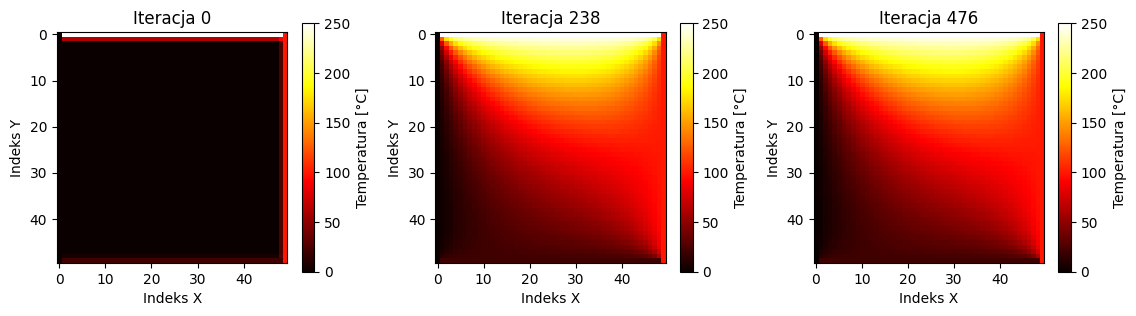


Liczba iteracji potrzebna do osiągnięcia stabilizacji: 1668


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Funkcja do symulacji przepływu ciepła w 2D
def simulate_heat_transfer_2D(Nx, Ny, TU, TD, TL, TR, k_values, max_iter=10000, tolerance=1e-2):
    temperatures = np.zeros((Ny, Nx))
    temperatures[0, :] = TU  
    temperatures[-1, :] = TD 
    temperatures[:, 0] = TL  
    temperatures[:, -1] = TR 

    snapshots = []
    snapshot_points = np.linspace(0, max_iter, 8, dtype=int)  # Więcej snapshotów

    for iteration in tqdm(range(max_iter), desc="Symulacja temperatury", unit="iter"):
        new_temperatures = temperatures.copy()
        
        for i in range(1, Ny - 1):
            for j in range(1, Nx - 1):
                k_x_left = (k_values[i, j] + k_values[i, j - 1]) / 2
                k_x_right = (k_values[i, j] + k_values[i, j + 1]) / 2
                k_y_up = (k_values[i, j] + k_values[i - 1, j]) / 2
                k_y_down = (k_values[i, j] + k_values[i + 1, j]) / 2
                
                new_temperatures[i, j] = (
                    k_x_right * temperatures[i, j + 1] +
                    k_x_left * temperatures[i, j - 1] +
                    k_y_up * temperatures[i - 1, j] +
                    k_y_down * temperatures[i + 1, j]
                ) / (k_x_left + k_x_right + k_y_up + k_y_down)

        if iteration in snapshot_points:
            snapshots.append(new_temperatures.copy())

        if np.max(np.abs(new_temperatures - temperatures)) < tolerance:
            snapshots.append(new_temperatures.copy())  
            return snapshots, iteration + 1
        
        temperatures = new_temperatures

    snapshots.append(temperatures.copy())  
    return snapshots, max_iter

# Parametry testowe
Nx, Ny = 50, 50
TL, TP, TG, TD = 250, 20, 0, 100  
tolerance = 1e-2
max_iter = 10000
kal = 237.0  

# Macierz współczynnika przewodnictwa cieplnego
k_values_2D = np.ones((Ny, Nx)) * kal

# Uruchomienie symulacji
print("Rozpoczynanie symulacji...")
snapshots, iterations_needed = simulate_heat_transfer_2D(
    Nx, Ny, TL, TP, TG, TD, k_values_2D, max_iter, tolerance
)

# Wizualizacja snapshotów
print("Generowanie wykresów...")
plt.figure(figsize=(15, 6))

for idx, (step, snapshot) in enumerate(zip(np.linspace(0, iterations_needed, 8, dtype=int), snapshots)):
    plt.subplot(2, 4, idx + 1)
    im = plt.imshow(snapshot, cmap='hot', interpolation='nearest')
    plt.title(f"Iteracja {step}")
    plt.xlabel("Indeks X")
    plt.ylabel("Indeks Y")
    plt.colorbar(im, label="Temperatura [°C]")

plt.tight_layout()
plt.show()

print(f"\nLiczba iteracji potrzebna do osiągnięcia stabilizacji: {iterations_needed}")


Stabilizacja temperatury wymagała 1668 iteracji, co pokazuje, że równomierne rozchodzenie się ciepła jest stopniowe, a osiągnięcie stanu ustalonego zajmuje określony czas.
Początkowo widoczne są duże różnice temperatur, szczególnie przy brzegach. W miarę upływu iteracji, temperatura rozkłada się bardziej równomiernie.
Wyższa temperatura na górnej krawędzi powoduje dominację ciepła w tej części domeny, co jest widoczne w końcowym rozkładzie.
Wykresy pośrednie (np. Iteracja 238 i 476) ukazują, jak ciepło stopniowo przemieszcza się z obszarów o wysokiej temperaturze do tych o niższej.


Zadanie 10

Symulacja postępuje: 100%|██████████| 5000/5000 [00:00<00:00, 9727.07iter/s]
Symulacja postępuje: 0iter [00:00, ?iter/s]
Symulacja postępuje: 100%|██████████| 5000/5000 [00:00<00:00, 10161.83iter/s]


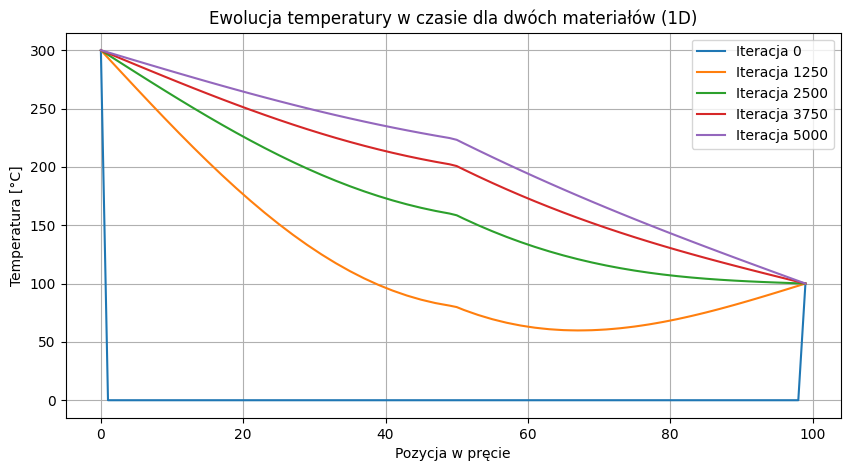

Liczba iteracji potrzebna do osiągnięcia stabilizacji: 5000


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Funkcja do symulacji przepływu ciepła w 1D dla materiału złożonego z dwóch różnych przewodności cieplnych
def simulate_heat_transfer_nonhomogeneous1D(N, T0, TN, k_values, max_iter=10000, tolerance=1e-2):
    temperatures = np.zeros(N)
    temperatures[0] = T0
    temperatures[-1] = TN

    for iteration in tqdm(range(max_iter), desc="Symulacja postępuje", unit="iter"):
        new_temperatures = temperatures.copy()

        # Aktualizacja temperatury w punktach wewnętrznych
        for i in range(1, N - 1):
            k_left = (k_values[i] + k_values[i - 1]) / 2
            k_right = (k_values[i] + k_values[i + 1]) / 2
            new_temperatures[i] = (k_right * temperatures[i + 1] + k_left * temperatures[i - 1]) / (k_left + k_right)
        
        if np.max(np.abs(new_temperatures - temperatures)) < tolerance:
            return new_temperatures, iteration + 1  # Zwracamy temperatury i liczbę iteracji
        
        temperatures = new_temperatures

    return temperatures, max_iter

# Parametry symulacji
N = 100  # Liczba węzłów siatki
T0, TN = 300, 100  # Warunki brzegowe (dowolnie dobrane)
max_iter = 5000  # Maksymalna liczba iteracji
tolerance = 1e-2  # Kryterium zbieżności

# Przewodność cieplna dwóch materiałów
k_values = np.ones(N)
k_values[:N//2] = 0.3  # Lewa połowa siatki - materiał 1
k_values[N//2:] = 0.1  # Prawa połowa siatki - materiał 2

# Symulacja i wizualizacja
temperatures_final, iterations_needed = simulate_heat_transfer_nonhomogeneous1D(N, T0, TN, k_values, max_iter, tolerance)

# Wizualizacja stanów nieustalonych na 5 etapach
snapshots = np.linspace(0, iterations_needed, 5, dtype=int)

plt.figure(figsize=(10, 5))
for idx, step in enumerate(snapshots):
    temp_snapshot, _ = simulate_heat_transfer_nonhomogeneous1D(N, T0, TN, k_values, step, tolerance)
    plt.plot(temp_snapshot, label=f"Iteracja {step}")

plt.xlabel("Pozycja w pręcie")
plt.ylabel("Temperatura [°C]")
plt.title("Ewolucja temperatury w czasie dla dwóch materiałów (1D)")
plt.legend()
plt.grid(True)
plt.show()

# Liczba iteracji potrzebna do osiągnięcia stabilizacji
print(f"Liczba iteracji potrzebna do osiągnięcia stabilizacji: {iterations_needed}")



Lewa część pręta (k1 = 0.3) wykazuje szybsze wyrównanie temperatury, co wskazuje na lepsze przewodnictwo cieplne.
Prawa część pręta (k2 = 0.1) osiąga równowagę wolniej, co jest wynikiem niższego współczynnika przewodnictwa cieplnego.

Początkowo temperatura gwałtownie spada w lewej części, natomiast prawa część reaguje wolniej.
Wraz z postępem iteracji różnice stopniowo zanikają, jednak w obszarze z niższym współczynnikiem przewodnictwa (prawa strona) proces jest bardziej opóźniony.

Do osiągnięcia stabilizacji temperatury wymagane było 5000 iteracji, co wskazuje na znaczne spowolnienie ustalania się temperatury w przypadku materiałów o niskim przewodnictwie cieplnym.

W ustabilizowanym stanie temperatura spada nieliniowo, przy czym większe nachylenie krzywej występuje w części z lepszym przewodnictwem (k1).

Systemy złożone z materiałów o różnych właściwościach wymagają większej liczby iteracji do osiągnięcia stanu ustalonego. W praktyce oznacza to konieczność dłuższego czasu chłodzenia lub nagrzewania w takich układach.

Podsumowanie: Wyniki potwierdzają, że różnice we współczynnikach przewodnictwa cieplnego znacząco wpływają na szybkość ustalania się temperatury w układzie, co jest istotnym aspektem w projektowaniu systemów termoizolacyjnych i zarządzaniu procesami cieplnymi.

Zadanie 11

Rozpoczynam symulację dla k1=0.05, k2=0.1...


Symulacja 0.07:  28%|██▊       | 2831/10000 [00:16<00:42, 167.30iter/s]


Rozpoczynam symulację dla k1=0.1, k2=0.1...


Symulacja 0.10:  28%|██▊       | 2786/10000 [00:15<00:41, 174.54iter/s]


Rozpoczynam symulację dla k1=0.2, k2=0.1...


Symulacja 0.15:  27%|██▋       | 2744/10000 [00:15<00:39, 181.69iter/s]


Rozpoczynam symulację dla k1=0.3, k2=0.1...


Symulacja 0.20:  27%|██▋       | 2721/10000 [00:15<00:40, 179.17iter/s]


Rozpoczynam symulację dla k1=0.5, k2=0.1...


Symulacja 0.30:  27%|██▋       | 2697/10000 [00:14<00:40, 182.02iter/s]


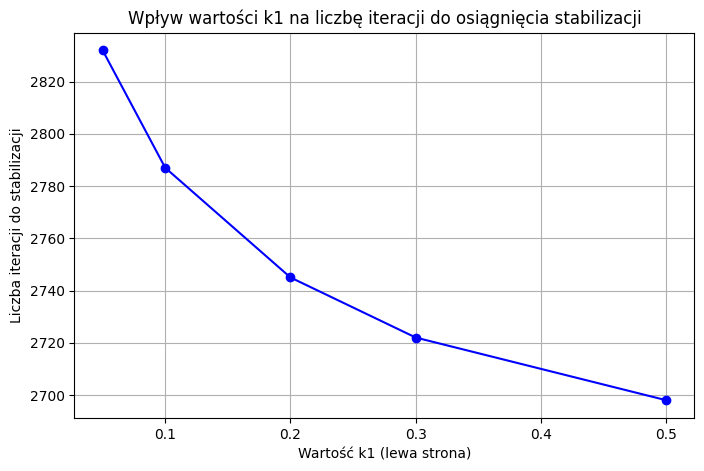

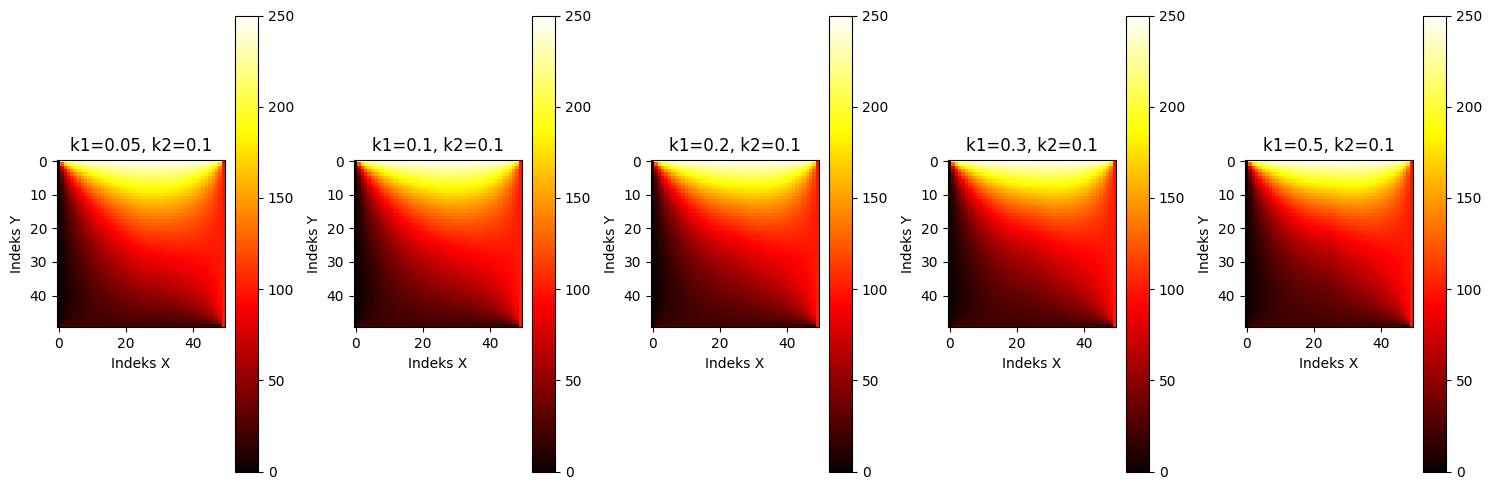


Tabela wyników wpływu współczynnika k na liczbę iteracji:
 Wartość k1  Liczba iteracji
       0.05             2832
       0.10             2787
       0.20             2745
       0.30             2722
       0.50             2698


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm  # Pasek postępu dla lepszej czytelności

# Funkcja symulująca przepływ ciepła w materiale niejednorodnym
def simulate_heat_transfer_nonhomogeneous2D(Nx, Ny, TU, TD, TL, TR, k_values, max_iter=10000, tolerance=0.001):
    temperatures = np.zeros((Ny, Nx))
    temperatures[0, :] = TU
    temperatures[-1, :] = TD
    temperatures[:, 0] = TL
    temperatures[:, -1] = TR

    for iteration in tqdm(range(max_iter), desc=f"Symulacja {np.mean(k_values):.2f}", unit="iter"):
        new_temperatures = temperatures.copy()
        for i in range(1, Ny - 1):
            for j in range(1, Nx - 1):
                k_x_left = (k_values[i, j] + k_values[i, j - 1]) / 2
                k_x_right = (k_values[i, j] + k_values[i, j + 1]) / 2
                k_y_up = (k_values[i, j] + k_values[i - 1, j]) / 2
                k_y_down = (k_values[i, j] + k_values[i + 1, j]) / 2
                
                new_temperatures[i, j] = (
                    k_x_right * temperatures[i, j + 1] + k_x_left * temperatures[i, j - 1] +
                    k_y_up * temperatures[i - 1, j] + k_y_down * temperatures[i + 1, j]
                ) / (k_x_left + k_x_right + k_y_up + k_y_down)
        
        if np.max(np.abs(new_temperatures - temperatures)) < tolerance:
            return new_temperatures, iteration + 1
        
        temperatures = new_temperatures

    return temperatures, max_iter

# Parametry symulacji
Nx, Ny = 50, 50
TL, TP, TG, TD = 250, 20, 0, 100  # Warunki brzegowe
max_iter = 10000
tolerance = 0.001

# Lista wartości współczynnika k do testowania
k_values_test = [0.05, 0.1, 0.2, 0.3, 0.5]
iterations_results = []

# Przechowywanie wyników temperatur dla różnych wartości k
temperature_results = {}

# Symulacja dla każdej wartości k
for k_test in k_values_test:
    k_variable = np.ones((Ny, Nx))
    k_variable[:, :Nx//2] = k_test  # Lewa strona zmienne k
    k_variable[:, Nx//2:] = 0.1     # Prawa strona stałe k = 0.1

    print(f"Rozpoczynam symulację dla k1={k_test}, k2=0.1...")
    temperatures, iterations_needed = simulate_heat_transfer_nonhomogeneous2D(
        Nx, Ny, TL, TP, TG, TD, k_variable, max_iter, tolerance
    )
    
    iterations_results.append((k_test, iterations_needed))
    temperature_results[k_test] = temperatures

# Wizualizacja zależności liczby iteracji od wartości k
k_values, iteration_counts = zip(*iterations_results)

plt.figure(figsize=(8, 5))
plt.plot(k_values, iteration_counts, marker='o', linestyle='-', color='blue')
plt.xlabel("Wartość k1 (lewa strona)")
plt.ylabel("Liczba iteracji do stabilizacji")
plt.title("Wpływ wartości k1 na liczbę iteracji do osiągnięcia stabilizacji")
plt.grid(True)
plt.show()

# Wizualizacja rozkładu temperatury dla różnych wartości k1
fig, axes = plt.subplots(1, len(k_values_test), figsize=(15, 5))

for idx, k_test in enumerate(k_values_test):
    im = axes[idx].imshow(temperature_results[k_test], cmap='hot', interpolation='nearest')
    axes[idx].set_title(f"k1={k_test}, k2=0.1")
    axes[idx].set_xlabel("Indeks X")
    axes[idx].set_ylabel("Indeks Y")
    plt.colorbar(im, ax=axes[idx])

plt.tight_layout()
plt.show()

# Tabela wyników
df_results = pd.DataFrame(iterations_results, columns=["Wartość k1", "Liczba iteracji"])

print("\nTabela wyników wpływu współczynnika k na liczbę iteracji:")
print(df_results.to_string(index=False))


Wzrost wartości współczynnika przewodnictwa cieplnego po lewej stronie materiału prowadzi do zmniejszenia liczby iteracji wymaganych do osiągnięcia stabilizacji. Wyższe wartości przewodnictwa cieplnego przyspieszają proces ustalania się temperatury, ponieważ ciepło efektywniej rozchodzi się w bardziej przewodzącym materiale. Mniejsza liczba iteracji oznacza jednocześnie krótszy czas obliczeń, co wskazuje na korzystny wpływ wyższych wartości współczynnika na szybkość symulacji.

Z kolei bardzo niskie wartości współczynnika przewodnictwa cieplnego znacząco spowalniają wymianę ciepła, co prowadzi do większej liczby iteracji i dłuższego czasu potrzebnego na osiągnięcie stabilizacji. Warto jednak zauważyć, że końcowy rozkład temperatury pozostaje zbliżony niezależnie od wartości współczynnika, co sugeruje, że wpływa on głównie na tempo konwergencji, a nie na sam rozkład temperatury w stanie ustalonym.